<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/96_C_DOE_DCL6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

#  **Tema 4: Diseños Cuadrados Latinos - DCL usando Python: Versión 2**

##  <span style="color:green">**Ejemplo. Para comparar el consumo de gasolina de cuatro automoviles, A, B, C y D, cuatro conductores, Juan, Santiago, Emilio y Pepe, efectuan un recorrido prefijado en cuatro dias diferentes, de manera que cada conductor utiliza un coche diferente cada día. Tanto la asignación de los coches a sus conductores como el orden de los dias se hizo de forma aleatoria. Disponemos de los siguientes datos correspondientes a los litros consumidos cada 100 km. Se cree, además, que la visibilidad puede influir sobre el consumo. Para evitar que en las circustancias anteriores los conductores se terminen cansando, se decide utilizar distintos grupos de conductores para cada turno y se obtienen los siguientes datos. Si cnsideramos ahora los datos, ¿Como cambia el analisis?**</span>


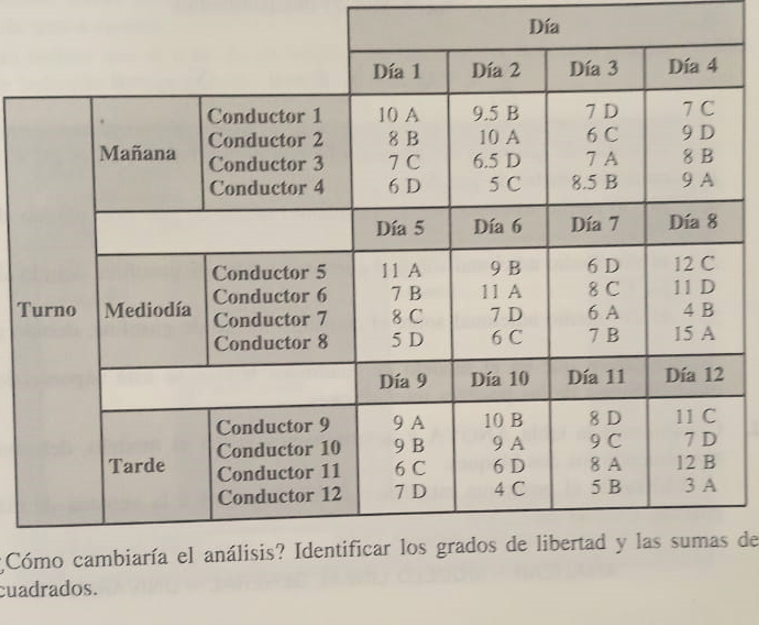

## **4.1 Los Datos del Problema - Usando Chat GPT**

In [6]:
## **4.1 Los Datos del Problema**
import pandas as pd

# Definir los datos en forma de lista de listas
data = [
    ["MAÑANA", "C1", "DIA1", "A", 10],
    ["MAÑANA", "C1", "DIA2", "B", 9.5],
    ["MAÑANA", "C1", "DIA3", "D", 7],
    ["MAÑANA", "C1", "DIA4", "C", 7],
    ["MAÑANA", "C2", "DIA1", "B", 8],
    ["MAÑANA", "C2", "DIA2", "A", 10],
    ["MAÑANA", "C2", "DIA3", "C", 6],
    ["MAÑANA", "C2", "DIA4", "D", 9],
    ["MAÑANA", "C3", "DIA1", "C", 7],
    ["MAÑANA", "C3", "DIA2", "D", 6.5],
    ["MAÑANA", "C3", "DIA3", "A", 7],
    ["MAÑANA", "C3", "DIA4", "B", 8],
    ["MAÑANA", "C4", "DIA1", "D", 6],
    ["MAÑANA", "C4", "DIA2", "C", 5],
    ["MAÑANA", "C4", "DIA3", "B", 8.5],
    ["MAÑANA", "C4", "DIA4", "A", 9],
    ["MEDIODIA", "C5", "DIA5", "A", 11],
    ["MEDIODIA", "C5", "DIA6", "B", 9],
    ["MEDIODIA", "C5", "DIA7", "D", 6],
    ["MEDIODIA", "C5", "DIA8", "C", 12],
    ["MEDIODIA", "C6", "DIA5", "B", 7],
    ["MEDIODIA", "C6", "DIA6", "A", 11],
    ["MEDIODIA", "C6", "DIA7", "C", 8],
    ["MEDIODIA", "C6", "DIA8", "D", 11],
    ["MEDIODIA", "C7", "DIA5", "C", 8],
    ["MEDIODIA", "C7", "DIA6", "D", 7],
    ["MEDIODIA", "C7", "DIA7", "A", 6],
    ["MEDIODIA", "C7", "DIA8", "B", 4],
    ["MEDIODIA", "C8", "DIA5", "D", 5],
    ["MEDIODIA", "C8", "DIA6", "C", 6],
    ["MEDIODIA", "C8", "DIA7", "B", 7],
    ["MEDIODIA", "C8", "DIA8", "A", 15],
    ["TARDE", "C9", "DIA9", "A", 9],
    ["TARDE", "C9", "DIA10", "B", 10],
    ["TARDE", "C9", "DIA11", "D", 8],
    ["TARDE", "C9", "DIA12", "C", 11],
    ["TARDE", "C10", "DIA9", "B", 9],
    ["TARDE", "C10", "DIA10", "A", 9],
    ["TARDE", "C10", "DIA11", "C", 9],
    ["TARDE", "C10", "DIA12", "D", 7],
    ["TARDE", "C11", "DIA9", "C", 6],
    ["TARDE", "C11", "DIA10", "D", 6],
    ["TARDE", "C11", "DIA11", "A", 8],
    ["TARDE", "C11", "DIA12", "B", 12],
    ["TARDE", "C12", "DIA9", "D", 7],
    ["TARDE", "C12", "DIA10", "C", 4],
    ["TARDE", "C12", "DIA11", "B", 5],
    ["TARDE", "C12", "DIA12", "A", 3]
]




## **4.2 Construyamos el dataFrame de los precios y productos**

In [9]:

# Definir el nombre de las columnas
columnas = ["Turno", "Conductor", "Dia", "AUTO", "Consumo"]

# Crear el DataFrame
DCL = pd.DataFrame(data, columns=columnas)



## **4.3 Veamos el DataFrame**

In [10]:

# Imprimir el DataFrame
print(DCL)


       Turno Conductor    Dia AUTO  Consumo
0     MAÑANA        C1   DIA1    A     10.0
1     MAÑANA        C1   DIA2    B      9.5
2     MAÑANA        C1   DIA3    D      7.0
3     MAÑANA        C1   DIA4    C      7.0
4     MAÑANA        C2   DIA1    B      8.0
5     MAÑANA        C2   DIA2    A     10.0
6     MAÑANA        C2   DIA3    C      6.0
7     MAÑANA        C2   DIA4    D      9.0
8     MAÑANA        C3   DIA1    C      7.0
9     MAÑANA        C3   DIA2    D      6.5
10    MAÑANA        C3   DIA3    A      7.0
11    MAÑANA        C3   DIA4    B      8.0
12    MAÑANA        C4   DIA1    D      6.0
13    MAÑANA        C4   DIA2    C      5.0
14    MAÑANA        C4   DIA3    B      8.5
15    MAÑANA        C4   DIA4    A      9.0
16  MEDIODIA        C5   DIA5    A     11.0
17  MEDIODIA        C5   DIA6    B      9.0
18  MEDIODIA        C5   DIA7    D      6.0
19  MEDIODIA        C5   DIA8    C     12.0
20  MEDIODIA        C6   DIA5    B      7.0
21  MEDIODIA        C6   DIA6   

## **4.5. BoxPlot para DCL - Consumo**

<Axes: title={'center': 'Consumo vs Turno'}, xlabel='Turno', ylabel='Consumo'>

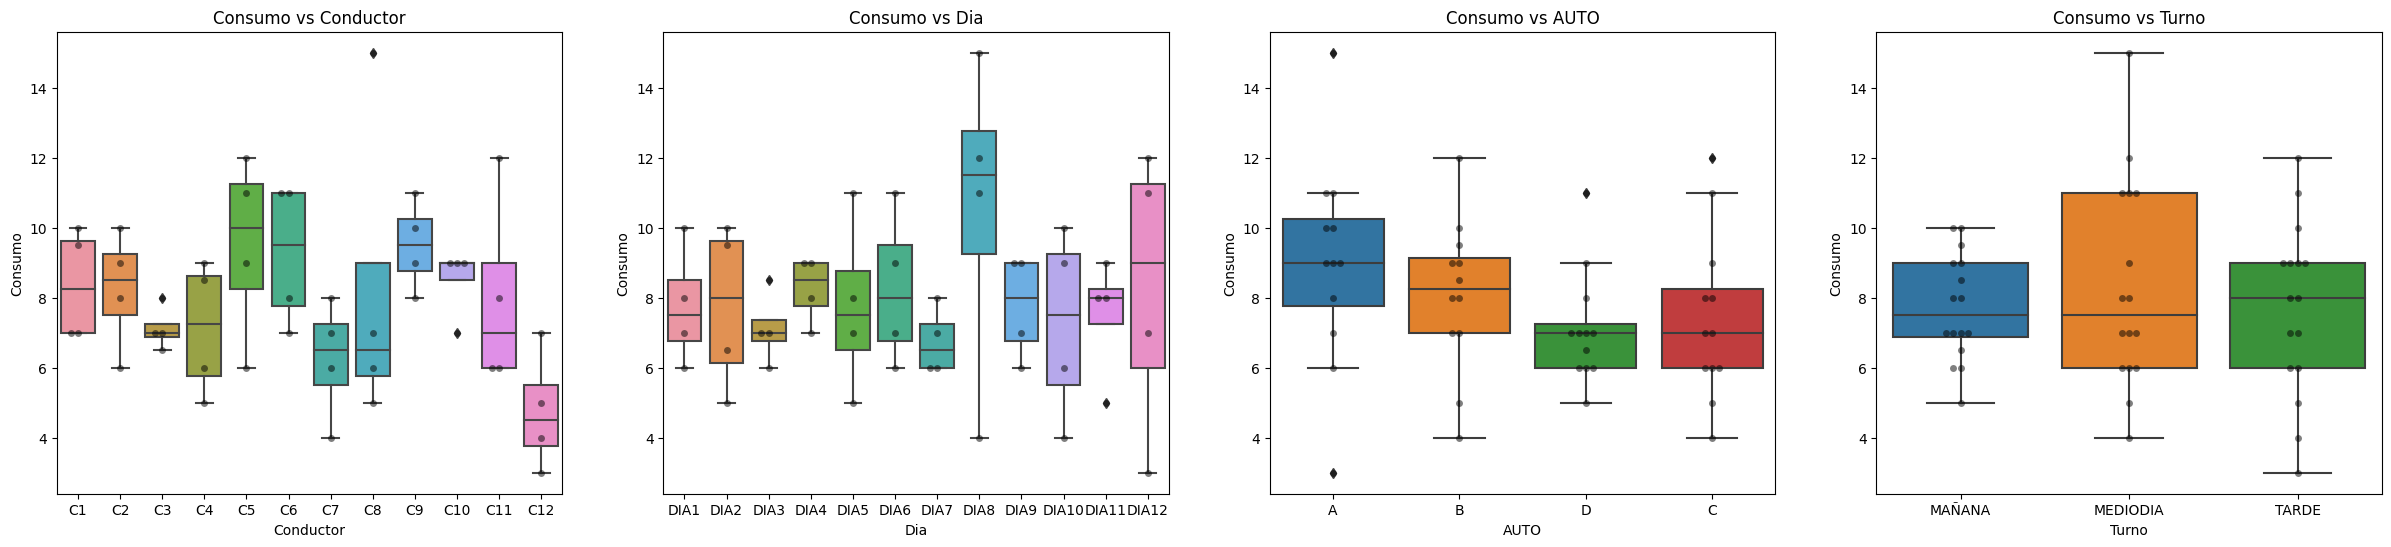

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(30, 6))
axs[0].set_title('Consumo vs Conductor')
sns.boxplot(x="Conductor", y="Consumo", data=DCL, ax=axs[0])
sns.swarmplot(x="Conductor", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Consumo vs Dia')
sns.boxplot(x="Dia", y="Consumo", data=DCL, ax=axs[1])
sns.swarmplot(x="Dia", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Consumo vs AUTO')
sns.boxplot(x="AUTO", y="Consumo", data=DCL, ax=axs[2])
sns.swarmplot(x="AUTO", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Consumo vs Turno')
sns.boxplot(x="Turno", y="Consumo", data=DCL, ax=axs[3])
sns.swarmplot(x="Turno", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[3])

## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**

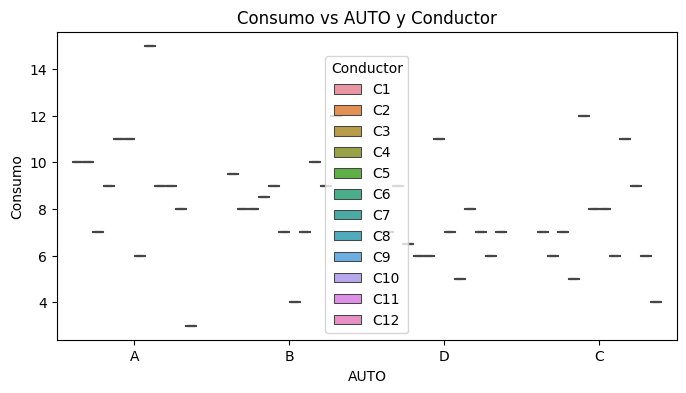

In [14]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Conductor')
sns.boxplot(x="AUTO", y="Consumo", hue='Conductor', data=DCL, ax=ax);

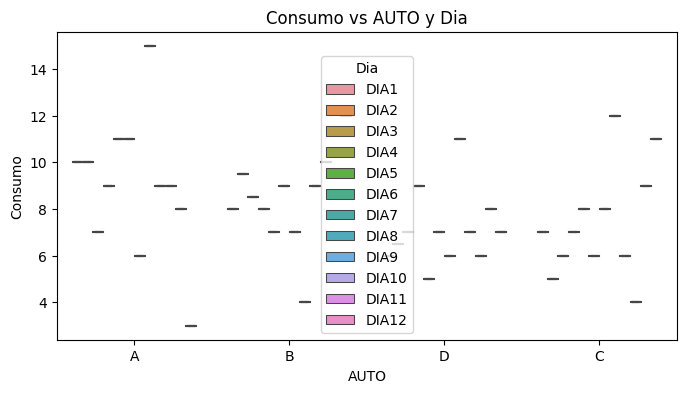

In [15]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Dia')
sns.boxplot(x="AUTO", y="Consumo", hue='Dia', data=DCL, ax=ax);

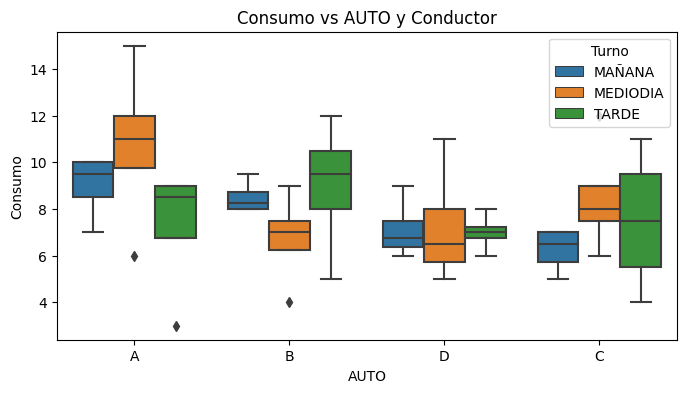

In [16]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Conductor')
sns.boxplot(x="AUTO", y="Consumo", hue='Turno', data=DCL, ax=ax);

## **4.7 Creando los DataFrame usando ChatGPT - Análisis de Varianza Tipo I**
# **a. El Anova normal**



In [19]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Realizar el ANOVA
modelo = ols('Consumo ~ AUTO + Turno + Conductor + Dia', data=DCL).fit()
anova_tabla = sm.stats.anova_lm(modelo)

# Imprimir la tabla ANOVA
print(anova_tabla)


             df      sum_sq   mean_sq         F    PR(>F)
AUTO        3.0   24.932292  8.310764  1.735049  0.186578
Turno       2.0    3.968750  1.984375  0.414281  0.665451
Conductor  11.0   92.207523  8.382502  1.750026  0.121775
Dia        11.0   42.277971  3.843452  0.802402  0.637127
Residual   24.0  114.958333  4.789931       NaN       NaN


## **4.8 Análisis de Varianza Tipo I - Usando Python y Statgraphics**



## **a. El Anova para el diseño anidado propuesto**

In [72]:
import pandas as pd
import statsmodels.formula.api as smf

nobs = 4
nT = 3
nC = 4
nD = 4
T = [f"T{i}" for i in range(1,nT+1) for h in range(nobs*nC)]
C = [f"C{j}" for i in range(1,nT+1) for j in range(1,nC+1) for h in range(nobs)]
D = [f"D{k}" for i in range(1,nT+1) for k in range(1,nD+1) for k in range(1,nD+1)]
obs = list(range(4))*nT*nC

data = (10, 9.5,	7,	7,	8,	10,	6,	9,	7,	6.5,	7,	8,	6,	5,	8.5,	9,	11,
          9,	6,	12,	7,	11,	8,	11,	8,	7,	6,	4,	5,	6,	7,	15,	9,	10,	8,	11,
          9,	9,	9,	7,	6,	6,	8,	12,	7,	4,	5,	3)

df3 = pd.DataFrame(data ={
    "Turno": T,
    "Conductor": C, 'Dia':D, 'AUTO':DCL['AUTO'],
    "Observation_number": obs,
},dtype="category")
df3 = df3.join(pd.Series(data=data,name="y"))

model = smf.ols("y ~ AUTO +  T/C + T/Dia",data=df3).fit()
anova_df = sm.stats.anova_lm(model)
print(anova_df)

            df      sum_sq   mean_sq         F    PR(>F)
AUTO       3.0   24.932292  8.310764  1.735049  0.186578
T          2.0    3.968750  1.984375  0.414281  0.665451
T:C        9.0   82.546875  9.171875  1.914824  0.098497
T:Dia      9.0   34.921875  3.880208  0.810076  0.611812
Residual  24.0  114.958333  4.789931       NaN       NaN


## **b. El Resultado obtenido usando el Statgraphics para el anova con dos anidamiento**

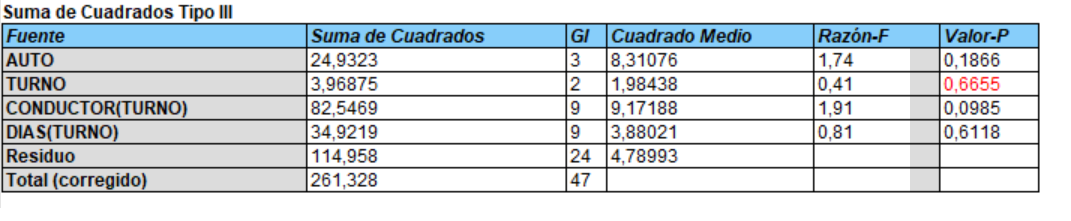

## **c. Verificando que se trata de nuestros datos**

In [77]:
df3['Consumo'] = df3['y']
df3

,Turno,Conductor,Dia,AUTO,Observation_number,y,Consumo
0,T1,C1,D1,A,0,10.0,10.0
1,T1,C1,D2,B,1,9.5,9.5
2,T1,C1,D3,D,2,7.0,7.0
3,T1,C1,D4,C,3,7.0,7.0
4,T1,C2,D1,B,0,8.0,8.0
5,T1,C2,D2,A,1,10.0,10.0
6,T1,C2,D3,C,2,6.0,6.0
7,T1,C2,D4,D,3,9.0,9.0
8,T1,C3,D1,C,0,7.0,7.0
9,T1,C3,D2,D,1,6.5,6.5


## **4.9 Comparaciones Múltiples**
### **a. Comparaciones Múltiples:DCL - AUTO**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9167,0.7678,-3.4432,1.6099,False
A,C,-1.5833,0.3498,-4.1099,0.9432,False
A,D,-1.875,0.2105,-4.4016,0.6516,False
B,C,-0.6667,0.8948,-3.1932,1.8599,False
B,D,-0.9583,0.7429,-3.4849,1.5682,False
C,D,-0.2917,0.9897,-2.8182,2.2349,False


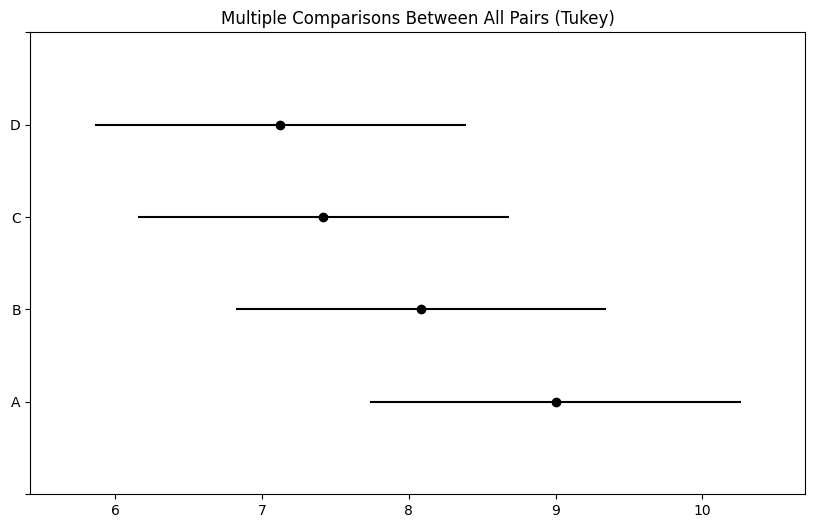

In [78]:
### **a. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df3["Consumo"],     # Data
                          groups=df3["AUTO"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **a. Comparaciones Múltiples:DCL - AUTO - Usando Statgraphics**

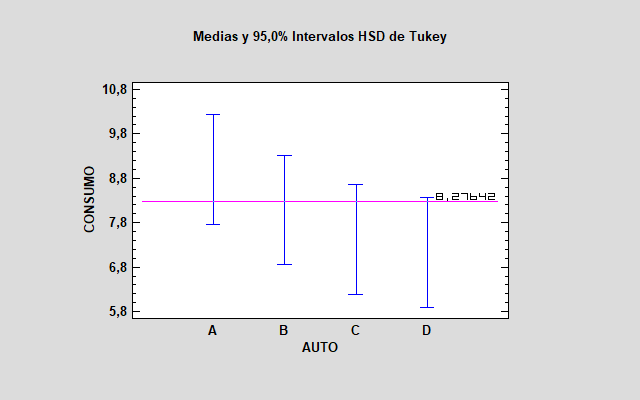

## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [80]:
# **a. Forma 1. Shapiro Wilks**
statistic, pvalue = stats.shapiro(model.resid)
print(f'El valor critico Shapiro wilks es {round(statistic,3)} y el valor p = {round(pvalue,1)*100} > 5%')

El valor critico Shapiro wilks es 0.967 y el valor p = 20.0 > 5%


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

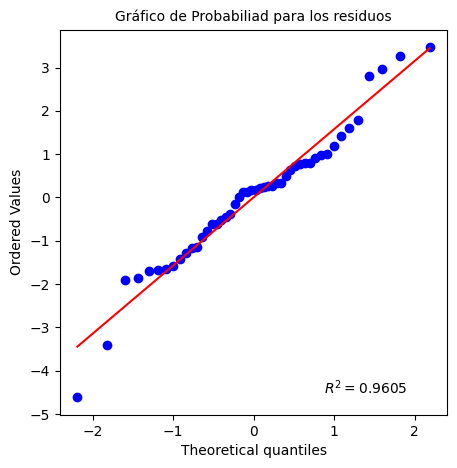

In [81]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **c. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [83]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene
statistic, pvalue = stats.levene(DCL['Consumo'][DCL['AUTO'] == 'A'],
             DCL['Consumo'][DCL['AUTO'] == 'B'],
             DCL['Consumo'][DCL['AUTO'] == 'C'],
             DCL['Consumo'][DCL['AUTO'] == 'D'])
print(f'El valor critico Levene es {round(statistic,3)} y el valor p = {round(pvalue,1)*100}% > 5%')


El valor critico Levene es 0.783 y el valor p = 50.0% > 5%
